In [4]:
from keras.utils import plot_model
from keras.models import Model
from keras.layers import Input
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import MaxPooling2D
from keras.layers import concatenate
from keras.layers import Conv2D


In [5]:
visible=Input(shape=(64,64,1))

In [6]:

# öznitelik cıkarma
#1,katman
conv1=Conv2D(32,kernel_size=4,activation="relu")(visible)
pool1=MaxPooling2D(pool_size=(2,2))(conv1)
flat1=Flatten()(pool1)


#2.katman
conv2=Conv2D(16,kernel_size=8,activation="relu")(visible)
pool2=MaxPooling2D(pool_size=(2,2))(conv2)
flat2=Flatten()(pool2)
#birleştirme katmanı
merge=concatenate([flat1,flat2])
hidden1=Dense(10,activation="relu")(merge)
#çıkış katmanı
output=Dense(1,activation="sigmoid")(hidden1)
model=Model(inputs=visible,outputs=output)


#model özetleme
model.summary()



Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_2 (InputLayer)        [(None, 64, 64, 1)]          0         []                            
                                                                                                  
 conv2d (Conv2D)             (None, 61, 61, 32)           544       ['input_2[0][0]']             
                                                                                                  
 conv2d_1 (Conv2D)           (None, 57, 57, 16)           1040      ['input_2[0][0]']             
                                                                                                  
 max_pooling2d (MaxPooling2  (None, 30, 30, 32)           0         ['conv2d[0][0]']              
 D)                                                                                           

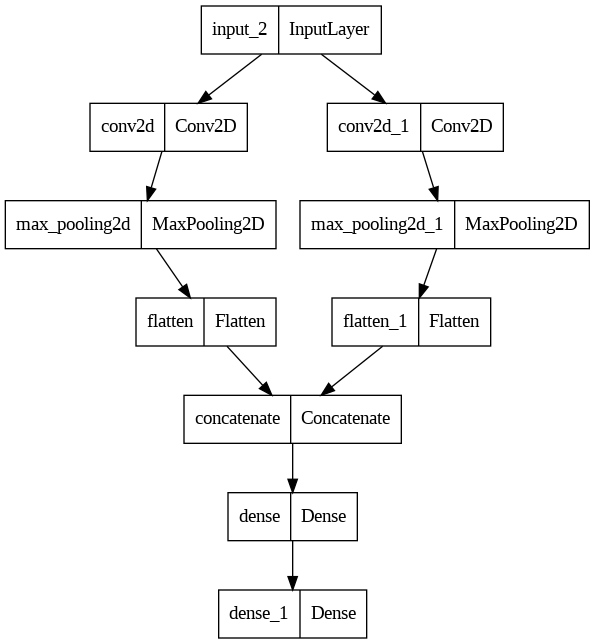

In [7]:
plot_model(model,to_file="model.png")